# Machine Learning Models from Scratch

## Linear Regression

In [69]:
# Only numpy bitch! fuck yo scikit.... ok now do it without numpy... 
import numpy as np

# little bit of matplot tho
import matplotlib.pyplot as plt

In [71]:
class LinearRegression:

    def __init__(self, learning_rate = 0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.theta = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.theta = np.zeros(n_features)

        y = y.ravel()
        
        for _ in range(self.n_iterations):
            y_pred = np.dot(X, self.theta)

            gradient = -(2 / n_samples) * np.dot(X.T, (y - y_pred))

            self.theta = self.theta - self.learning_rate * gradient

    def predict(self, X):
        return np.dot(X, self.theta)

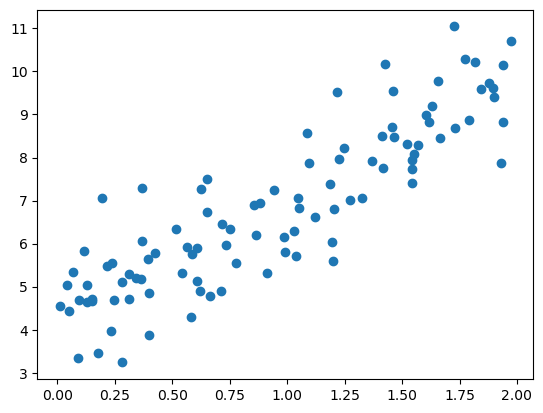

In [73]:
# Create our data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

X_b = np.c_[np.ones((X.shape[0], 1)), X]

# visualise our data
plt.scatter(X, y)


In [75]:
# Train the beast

lin_reg = LinearRegression()
lin_reg.fit(X_b, y)

In [81]:
y_pred = lin_reg.predict(X_b)
print("Learned weights (theta):", lin_reg.theta)

Learned weights (theta): [4.1819175  2.79940834]


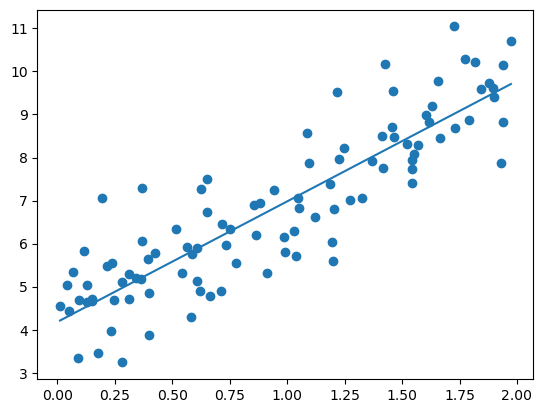

In [10]:
# Revisualise with theta
plt.scatter(X, y)

X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_b = np.c_[np.ones((X_range.shape[0], 1)), X_range]
y_pred = X_range_b.dot(lin_reg.theta)

plt.plot(X_range, y_pred)

so this is great and all... but I still didn't derive this from scratch myself... i had help... im pathetic at this stuff... i try again!

## Procedurally building linear_regression

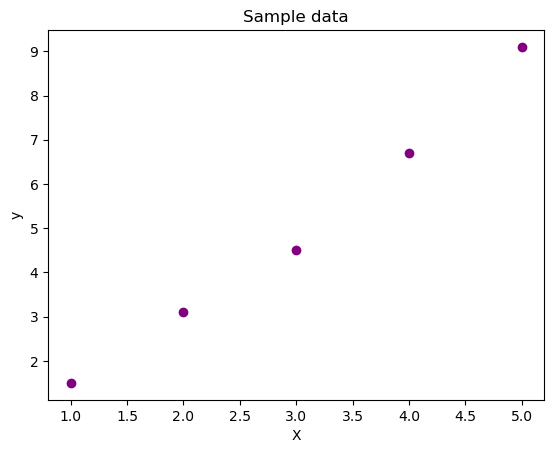

In [48]:
# X = 2 * np.random.randn(100, 1)
# y = 1 + 2 * X + np.random.randn(100,1)
X = np.array([1,2,3,4,5]).reshape(-1,1)
y = np.array([1.5, 3.1, 4.5, 6.7, 9.1])

plt.scatter(X,y, color="purple")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Sample data")
plt.show()

In [50]:
# Add the bias

X_b = np.c_[np.ones((X.shape[0], 1)), X]
X_b

array([[1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.]])

In [52]:
# initialize weights

theta = np.zeros(X_b.shape[1])
theta

array([0., 0.])

In [54]:
# Calculate a prediction

y_pred = np.dot(X_b, theta)
y_pred

array([0., 0., 0., 0., 0.])

In [56]:
# Define the cost function

def compute_cost(X_b, y, theta):
    n_samples = len(y)
    y_pred = np.dot(X_b, theta)
    cost = (1/n_samples) * np.sum((y - y_pred) **2)
    return cost

initial_cost = compute_cost(X_b, y, theta)
initial_cost

31.962000000000003

In [63]:
# Running gradient decent

learning_rate = 0.01
n_iterations = 1000
XX = []
yy = []
for iteration in range(n_iterations):
    y_pred = np.dot(X_b, theta)
    gradient = -(2/len(y)) * np.dot(X_b.T, (y-y_pred))
    theta -= learning_rate * gradient
    XX.append(theta[0])
    yy.append(theta[1])

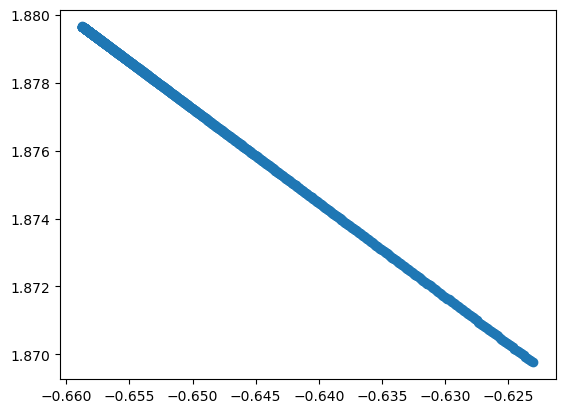

In [67]:
y_pred = np.dot(X_b, theta)

plt.scatter(XX, yy)
# plt.plot( X, y_pred)

So again from the top:

- Get the data, your x and ys
- add the bias term to theta; a column of ones
- initialize theta; an array or 0s with as many elemtns as features of X, I think only 2 for linear reg
- perform gradient decent
- 